# Results R1b: What sentiment, topic and social networks are evident in the texts?

## Multilevel (i.e., random effects) models clustering on docauthorid

## Resources

In [1]:
# Get Packages & Libraries
library(tidyverse)
library(brms)
library(ggridges)
library(tidybayes)
library(bayesplot)
library(rethinking)

── Attaching core tidyverse packages ───────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Rcpp

Loading 'brms' package (version 2.21.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar



Attaching package: ‘tidybayes’


The following objects are masked from ‘package:ggridges’:

    scale_point_color_continuous, scale_point_color_discre

In [2]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

st <- function(x){
    (x-mean(x,na.rm=TRUE))/sd(x,na.rm=TRUE)
}

In [101]:
#View Data
df1  <- read.csv("20240701_PhD_FinalData-Diary.csv")
df1[df1 == ''] <- NA #replace blank cells with NA
df1 <- df1[-c(1:2)] #drop the index columns
df1 <- factorize(df1)
colnames(df1)

[1] "docyear"          "docmonth"         "authorName"       "docauthorid"     
 [5] "authorLocation"   "authorGender"     "nationalOrigin"   "irish"           
 [9] "otherUK"          "relMin"           "catholic"         "otherChristian"  
[13] "U"                "M"                "S"                "F"               
[17] "L"                "text"             "totalTokens"      "uniqueTokens"    
[21] "lexicalDiversity" "scoreNeg"         "scoreNeu"         "scorePos"        
[25] "scoreCom"         "mentsDis"         "mentsTot"         "indsTot"         
[29] "fppAll_Ct"        "fppSub_Ct"        "fppObj_Ct"

In [3]:
# Get Data
# View Data
df2  <- read.csv("20240702_PhD_FinalData-DiaryChk.csv")
df2[df2 == ''] <- NA #replace blank cells with NA
#df2 <- df2[-c(1:2)] #drop the index columns
df2 <- factorize(df2)
glimpse(df2)

Rows: 1,023
Columns: 41
$ docid            <fct> D0002, D0002, D0002, D0002, D0002, D0002, D0002, D000…
$ docyear          <int> 1883, 1883, 1883, 1883, 1883, 1883, 1883, 1883, 1883,…
$ docmonth         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ authorName       <fct> Anne F. Richards, Anne F. Richards, Anne F. Richards,…
$ docauthorid      <fct> D0002, D0002, D0002, D0002, D0002, D0002, D0002, D000…
$ authorLocation   <fct> Australia, Australia, Australia, Australia, Australia…
$ authorGender     <fct> F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> English, English, English, English, English, English,…
$ irish            <fct> False, False, False, False, False, False, False, Fals…
$ otherUK          <fct> True, True, True, True, True, True, True, True, True,…
$ relMin           <fct> False, False, False, False, False, False, False, Fals…
$ catholic         <fct> False, False, False, False, False, False, False, Fals…
$ otherChristian

In [4]:
# Get counts for topic number
table(as.factor(df2$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df2$topicLabel <- as.character(df2$topicNumber)
df2$topicLabel[df2$topicLabel=="0"]  <- "01 Housework"
df2$topicLabel[df2$topicLabel=="1"]  <- "02 Places"
df2$topicLabel[df2$topicLabel=="2"]  <- "03 Business"
df2$topicLabel[df2$topicLabel=="3"]  <- "04 Girl Privilege"
df2$topicLabel[df2$topicLabel=="4"]  <- "05 Working Boy"
df2$topicLabel[df2$topicLabel=="5"]  <- "06 Weather"
df2$topicLabel[df2$topicLabel=="6"]  <- "07 People"
df2$topicLabel[df2$topicLabel=="7"]  <- "08 Politics"
df2$topicLabel[df2$topicLabel=="8"]  <- "09 Outback"
df2$topicLabel[df2$topicLabel=="9"]  <- "10 Home"
df2$topicLabel <- as.factor(df2$topicLabel)

# Check
df2 %>% 
select(topicNumber, topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

table(df2$topicLabel)
sum(is.na(df2$topicLabel))


  0   1   2   3   4   5   6   7   8   9 
135 111 100 144 107  71  89 109  93  64 

topicNumber,topicLabel
<int>,<fct>
0,01 Housework
1,02 Places
2,03 Business
3,04 Girl Privilege
4,05 Working Boy
5,06 Weather
6,07 People
7,08 Politics
8,09 Outback



     01 Housework         02 Places       03 Business 04 Girl Privilege 
              135               111               100               144 
   05 Working Boy        06 Weather         07 People       08 Politics 
              107                71                89               109 
       09 Outback           10 Home 
               93                64 

[1] 0

In [5]:
#Socials Variable Prep
df2$mentsRate <- df2$mentsTot/df2$totalTokens
df2$fppAllRate <- df2$fppAll_Ct/df2$totalTokens

## Sentiment

$$sentimentDiary_{ik} \sim Norm(\mu_{ik}, \sigma)$$
$$\mu_{ik} = \alpha_k$$
$$\alpha_k \sim Norm(\gamma, \eta)$$
$$\sigma \sim Unif(0, 10)$$
$$\gamma \sim Norm(0, 3)$$
$$\eta \sim Unif(0, 10)$$

In [16]:
# Used this to verify that brm giving the same result as quap for single level model. All good.
f1s <- brm(data=df2,
           family=gaussian,
           scoreCom ~ 1,
           prior=c(prior("normal(0,3)",class=Intercept),
                   prior("uniform(0,10)",class=sigma, ub = 10)),
           iter=2000,warmup = 1000,chains=4,cores=4, 
           seed = 4,
           file = "20240702_PhD_DiaChkSenBRMS_01")

print(f1s)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ 1 
   Data: df2 (Number of observations: 1023) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.07      0.01    -0.09    -0.05 1.00     3568     2594

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.36      0.01     0.35     0.38 1.00     3827     2641

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


In [7]:
get_prior(data = df2, 
          family = 'gaussian',
          scoreCom ~ 1 + (1 | docauthorid))

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"student_t(3, 0, 2.5)",Intercept,,,,,,,,default
"student_t(3, 0, 2.5)",sd,,,,,,0,,default
,sd,,docauthorid,,,,,,default
,sd,Intercept,docauthorid,,,,,,default
"student_t(3, 0, 2.5)",sigma,,,,,,0,,default


In [15]:
f1m <- brm(
    formula= scoreCom ~ 1 + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=3000, warmup = 1000, seed = 4,
    control=list(adapt_delta=.99, max_treedepth=12),
    file = "20240723_PhD_DiaChkSen_02.rds"
)

print(f1m)

Compiling Stan program...

Start sampling

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Warning message:
“There were 4 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“There were 4 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ 1 + (1 | docauthorid) 
   Data: df2 (Number of observations: 1023) 
  Draws: 4 chains, each with iter = 3000; warmup = 1000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 4) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.23      0.21     0.07     0.82 1.00      964     1211

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.03      0.15    -0.37     0.25 1.00     1243      944

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.35      0.01     0.33     0.36 1.00     3769     3621

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at converge

In [16]:
#f1s <- readRDS("20240702_PhD_DiaChkSenBRMS_01.rds")
#f1m <- readRDS("20240723_PhD_DiaChkSen_02.rds")

In [17]:
f1s <- add_criterion(f1s, "waic")
f1m <- add_criterion(f1m, "waic")

w <- loo_compare(f1s, f1m, criterion = "waic")

print(w, simplify = F)

Automatically saving the model object in '20240723_PhD_DiaChkSen_02.rds'



    elpd_diff se_diff elpd_waic se_elpd_waic p_waic se_p_waic waic   se_waic
f1m    0.0       0.0  -375.7      31.1          4.3    0.3     751.3   62.1 
f1s  -38.2       9.6  -413.9      28.8          2.6    0.2     827.8   57.6 


The WAIC is better (i.e., lower) for the multilevel model (f1m).

In [18]:
post <- as_draws_df(f1m)

posterior_summary(f1m)[0:3,]

post_mdn <- 
  coef(f1m, robust = T)$docauthorid[, , ] %>% 
  data.frame()

head(post_mdn)

,Estimate,Est.Error,Q2.5,Q97.5
b_Intercept,-0.03214315,0.152386170,-0.36860809,0.2477397
sd_docauthorid__Intercept,0.23155200,0.208529085,0.06787662,0.8165238
sigma,0.34874495,0.007835573,0.33398782,0.3648102


,Estimate,Est.Error,Q2.5,Q97.5
,<dbl>,<dbl>,<dbl>,<dbl>
D0002,-0.17686374,0.01625886,-0.20854416,-0.14577137
D0003,0.08145711,0.03477284,0.01558125,0.14983726
D0007,-0.02041526,0.01901582,-0.05920060,0.01722618
D0009,0.02877192,0.02894141,-0.02677986,0.08343090


Picking joint bandwidth of 0.0133

Saving 7 x 7 in image
Picking joint bandwidth of 0.0133



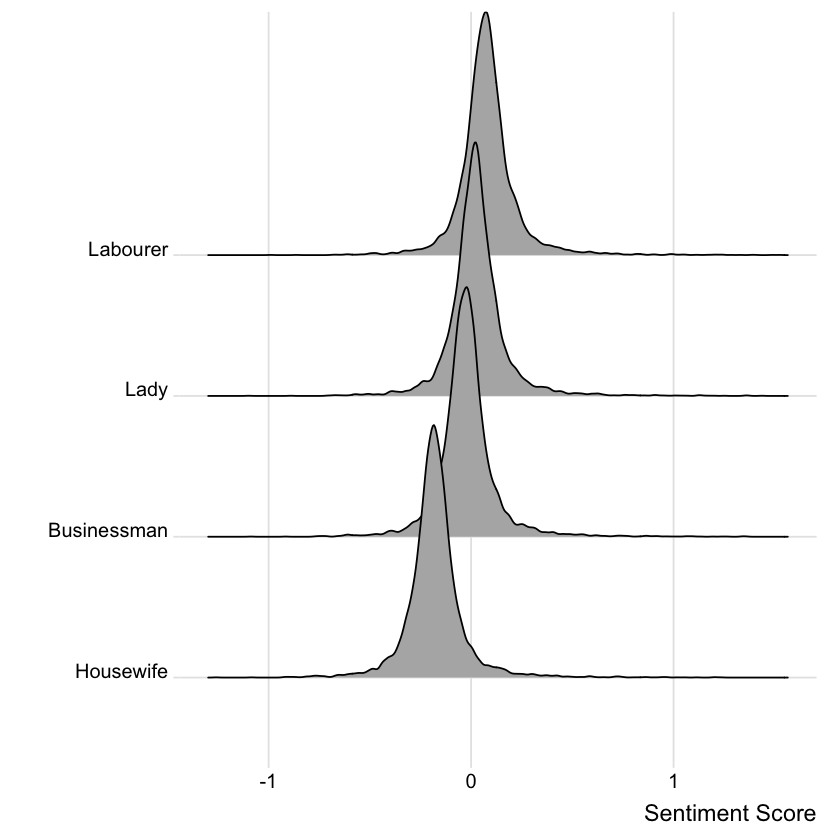

In [19]:
nd <- distinct(df2, docauthorid)


f <- data.frame(ranef(f1m,
         newdata = nd,
         re_formula = NA,
         probs = c(.1, .90), 
         summary = F))

colnames(f) <- c("Housewife", "Labourer", "Businessman", "Lady")

fe <- fixef(f1m, probs = .90)

f$Housewife <- fe[1,1] + f$Housewife
f$Labourer <- fe[1,1] + f$Labourer
f$Businessman <- fe[1,1] + f$Businessman
f$Lady <- fe[1,1] + f$Lady

f <- f %>%                                   
  gather(variable, value) 

ggplot(f, aes(x = value, y = reorder(variable, value))) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Sentiment Score") +
    ylab("")

#ggsave("20240714_PhD_DiaSenWri.png")

Picking joint bandwidth of 0.0129

Warning message:
“Removed 615 rows containing non-finite outside the scale range
(`stat_density_ridges()`).”


$y
[1] ""

attr(,"class")
[1] "labels"

Saving 7 x 7 in image
Picking joint bandwidth of 0.0129

Warning message:
“Removed 615 rows containing non-finite outside the scale range
(`stat_density_ridges()`).”


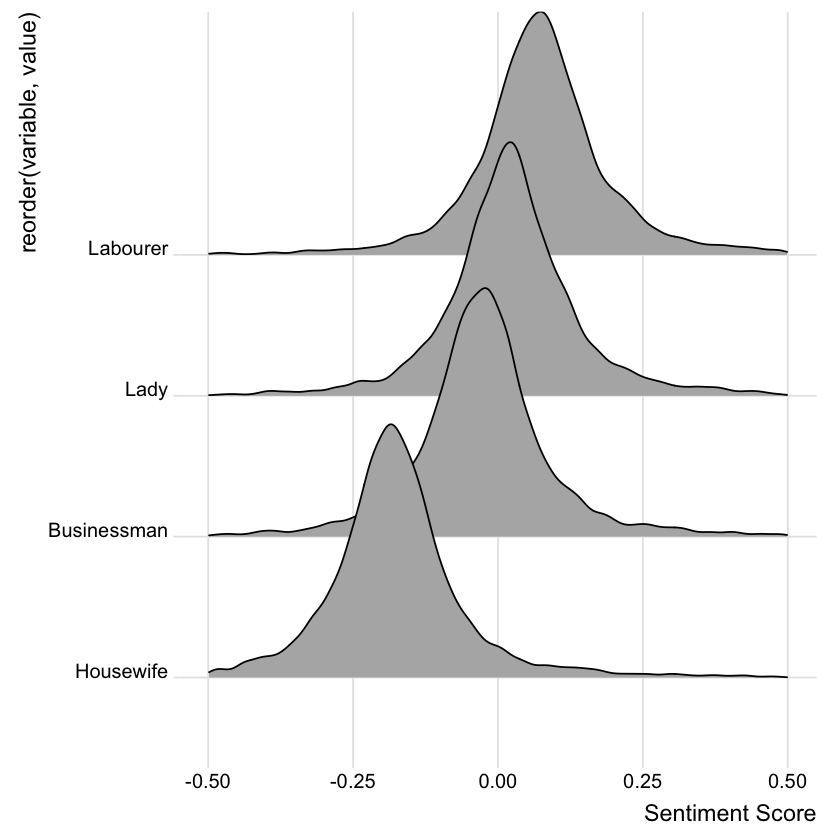

In [42]:
ggplot(f, aes(x = value, y = reorder(variable, value))) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Sentiment Score") +
scale_x_continuous(limits = c(-0.5, .5), breaks=c(-0.5, -0.05, 0, 0.05, .5))
    ylab("")

ggsave("20240723_PhD_DiaSenWri.png")

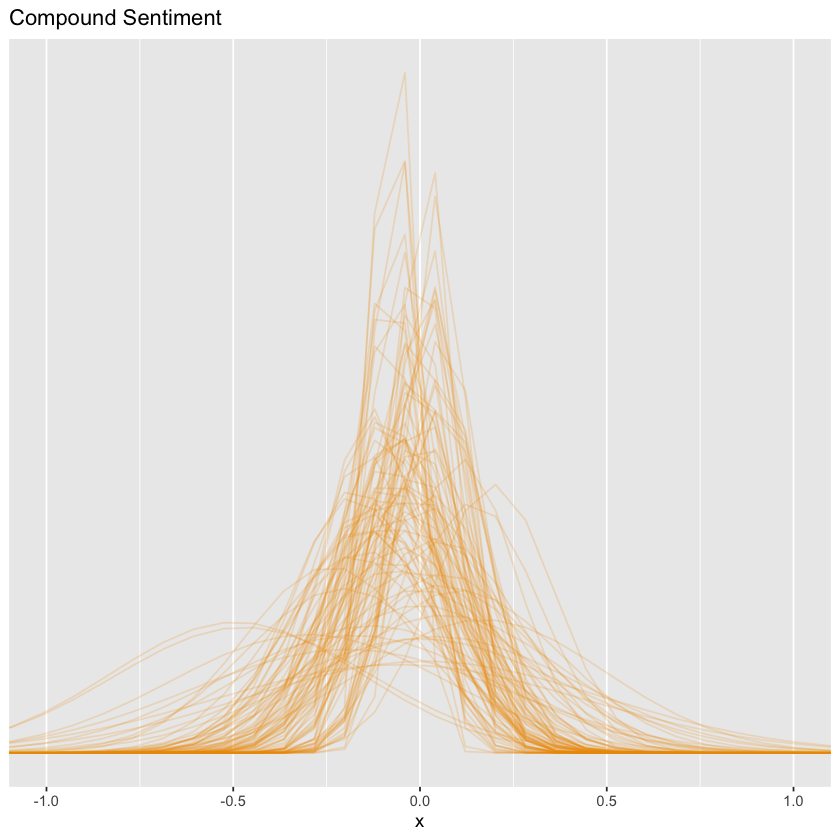

In [26]:
#p1 <-
  #post %>% 
  #slice_sample(n = 100) %>% 
  #expand_grid(x = seq(from = -4, to = 4, length.out = 100)) %>%
  #mutate(density = dnorm(x, mean = b_Intercept, sd = sd_docauthorid__Intercept)) %>%     
  #ggplot(aes(x = x, y = density, group = .draw)) +
  #geom_line(alpha = .2, color = "orange2") +
  #scale_y_continuous(NULL, breaks = NULL) +
  #labs(title = "Compound Sentiment") +
  #coord_cartesian(xlim = c(-1, 1))

## Topics

$$letterTopics_i \sim Cat(softmax(topic_{1i}, topic_{2i}, ... , topic_{ki})$$
$$topic_{1i} = 0$$
$$topic_{2i}, ... ,topic_{ki} = \alpha_{topic_2}, ... ,\alpha_{topic_k} $$
$$\alpha_{topic_2}, ... , \alpha_{topic_k} \sim Norm(0,2)$$

In [27]:
get_prior(data = df2, 
          family = categorical(link = logit, refcat = "06 Weather"),
          topicLabel ~ 1 + (1 | docauthorid))

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"student_t(3, 0, 2.5)",Intercept,,,,mu01Housework,,,,default
"student_t(3, 0, 2.5)",sd,,,,mu01Housework,,0,,default
,sd,,docauthorid,,mu01Housework,,,,default
,sd,Intercept,docauthorid,,mu01Housework,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu02Places,,,,default
"student_t(3, 0, 2.5)",sd,,,,mu02Places,,0,,default
,sd,,docauthorid,,mu02Places,,,,default
,sd,Intercept,docauthorid,,mu02Places,,,,default
"student_t(3, 0, 2.5)",Intercept,,,,mu03Business,,,,default


In [43]:
f4m <- brm(data = df2, 
      family = categorical(link = logit, refcat = "06 Weather"),
      topicLabel ~ 1 + (1 | docauthorid),
      prior = c(prior(normal(0, 2), class = Intercept, dpar = mu01Housework),
                prior(normal(0, 2), class = Intercept, dpar = mu02Places),
                prior(normal(0, 2), class = Intercept, dpar = mu03Business),
                prior(normal(0, 2), class = Intercept, dpar = mu04GirlPrivilege),
                prior(normal(0, 2), class = Intercept, dpar = mu05WorkingBoy),
                prior(normal(0, 2), class = Intercept, dpar = mu07People),
                prior(normal(0, 2), class = Intercept, dpar = mu08Politics),
                prior(normal(0, 2), class = Intercept, dpar = mu09Outback),
                prior(normal(0, 2), class = Intercept, dpar = mu10Home)),
      chains=4, cores=4, iter=3000, warmup = 1000, seed = 4,
      control=list(adapt_delta=.99, max_treedepth=12),
      file = "20240723_PhD_DiaChkTop_02.rds"
          )

# Using the default priors for all others.

Compiling Stan program...

Start sampling

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’



In [44]:
print(f4m)

 Family: categorical 
  Links: mu01Housework = logit; mu02Places = logit; mu03Business = logit; mu04GirlPrivilege = logit; mu05WorkingBoy = logit; mu07People = logit; mu08Politics = logit; mu09Outback = logit; mu10Home = logit 
Formula: topicLabel ~ 1 + (1 | docauthorid) 
   Data: df2 (Number of observations: 1023) 
  Draws: 4 chains, each with iter = 3000; warmup = 1000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 4) 
                                Estimate Est.Error l-95% CI u-95% CI Rhat
sd(mu01Housework_Intercept)         1.83      1.58     0.07     5.67 1.00
sd(mu02Places_Intercept)            6.45      3.88     2.64    16.12 1.00
sd(mu03Business_Intercept)          6.31      3.61     2.63    15.17 1.00
sd(mu04GirlPrivilege_Intercept)     4.61      2.25     2.11     9.91 1.00
sd(mu05WorkingBoy_Intercept)        5.05      2.16     2.41    10.63 1.00
sd(mu07People_Intercept)            1.30      1.24     0.04     4.

In [45]:
f4mVis <- fitted(f4m)[1, , ] %>%  round(digits = 2)

,Probability
,<dbl>
Housework,0.29
Places,0.00
Business,0.00
GirlPrivilege,0.01
WorkingBoy,0.00
Weather,0.15
People,0.20
Politics,0.00
Outback,0.20


[1] 1

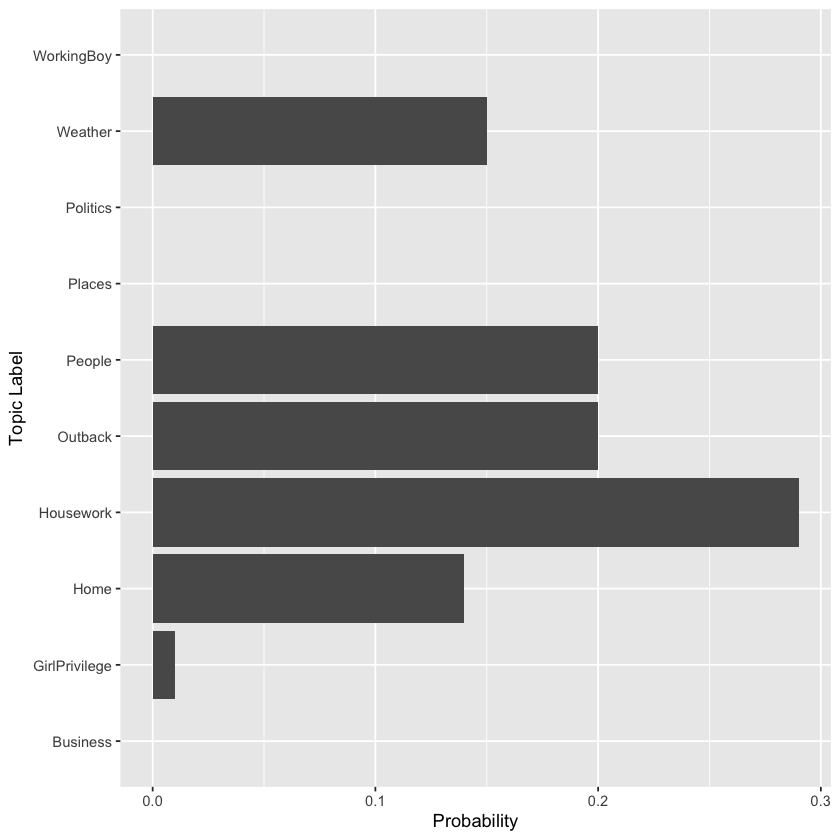

In [46]:
topicVis <- as.data.frame(f4mVis[1,])
colnames(topicVis) <- c("Probability")
rownames(topicVis) <- c("Housework", "Places", "Business", "GirlPrivilege", "WorkingBoy", "Weather", "People", "Politics", "Outback", "Home")
topicVis

round(sum(topicVis$Probability), digits=0)

# Barplot
p  <- ggplot(topicVis, aes(x=rownames(topicVis), y=Probability)) + 
  geom_bar(stat = "identity") +
  coord_flip() + xlab("Topic Label")
p

In [47]:
ggsave("20240723_PhD_DiaChkTop02.png")

Saving 7 x 7 in image


In [54]:
df2 %>%
  group_by(authorName, topicLabel) %>%
  tally() %>%
  spread(authorName, n) %>% 
replace(is.na(.), 0)

topicLabel,Anne F. Richards,Edith C. Gwynne,Henry H. Adams,John Hart
<fct>,<int>,<int>,<int>,<int>
01 Housework,131,4,0,0
02 Places,0,0,0,111
03 Business,0,0,0,100
04 Girl Privilege,5,139,0,0
05 Working Boy,2,5,100,0
06 Weather,69,0,0,2
07 People,88,0,0,1
08 Politics,0,0,0,109
09 Outback,91,2,0,0


## Socials

$$socialRates_{ik} \sim Norm(\mu_{ik}, \sigma)$$
$$\mu_{ik} = \alpha_k$$
$$\alpha_k \sim Norm(\gamma, \eta)$$
$$\sigma \sim Unif(0,10)$$
$$\gamma \sim Norm(0, 1)$$
$$\eta \sim Unif(0, 10)$$

In [49]:
get_prior(data = df2, 
          family = 'gaussian',
          mentsRate ~ 1 + (1 | docauthorid))

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"student_t(3, 0, 2.5)",Intercept,,,,,,,,default
"student_t(3, 0, 2.5)",sd,,,,,,0,,default
,sd,,docauthorid,,,,,,default
,sd,Intercept,docauthorid,,,,,,default
"student_t(3, 0, 2.5)",sigma,,,,,,0,,default


In [55]:
f7m <- brm(
    formula= mentsRate ~ 1 + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,1)",class="Intercept"),
        set_prior("uniform(0,10)",class="sigma", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=3000, warmup = 1000, seed = 4,
    control=list(adapt_delta=.99, max_treedepth=12),
    file = "20240724_PhD_ChkSocM_02"
)

print(f7m)

Compiling Stan program...

Start sampling

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Warning message:
“There were 2 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: mentsRate ~ 1 + (1 | docauthorid) 
   Data: df2 (Number of observations: 1023) 
  Draws: 4 chains, each with iter = 3000; warmup = 1000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 4) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.02      0.01     0.01     0.05 1.00      967      949

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.04      0.01     0.02     0.06 1.00     1252      803

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.01      0.00     0.01     0.02 1.00     3419     3294

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at converg

In [58]:
post <- as_draws_df(f7m)

posterior_summary(f7m)[0:3,]

post_mdn <- 
  coef(f7m, robust = T)$docauthorid[, , ] %>% 
  data.frame()

head(post_mdn)

,Estimate,Est.Error,Q2.5,Q97.5
b_Intercept,0.03733486,0.0104142435,0.01661807,0.05689644
sd_docauthorid__Intercept,0.01588484,0.0141635703,0.00512732,0.05032340
sigma,0.01449767,0.0003113694,0.01389597,0.01513636


,Estimate,Est.Error,Q2.5,Q97.5
,<dbl>,<dbl>,<dbl>,<dbl>
D0002,0.04605386,0.0006992368,0.04468687,0.04737606
D0003,0.02977228,0.0014666070,0.02686290,0.03264712
D0007,0.03122359,0.0008138319,0.02967737,0.03280710
D0009,0.04263348,0.0011503553,0.04036108,0.04497648


D0002: Housewife, D0003: Labourer, D0007: Businessman, D0009: Lady

In [68]:
nd <- distinct(df2, docauthorid)


f <- data.frame(ranef(f7m,
         newdata = nd,
         re_formula = NA,
         probs = c(.1, .90), 
         summary = F))

colnames(f) <- c("Housewife", "Labourer", "Businessman", "Lady")

fe <- fixef(f7m, probs = .90)

f$Housewife <- fe[1,1] + f$Housewife
f$Labourer <- fe[1,1] + f$Labourer
f$Businessman <- fe[1,1] + f$Businessman
f$Lady <- fe[1,1] + f$Lady

f <- f %>%                                   
  gather(variable, value) 

summary(f$value)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.03267  0.02962  0.03703  0.03742  0.04482  0.14275 

Picking joint bandwidth of 0.000905

Saving 7 x 7 in image
Picking joint bandwidth of 0.000905



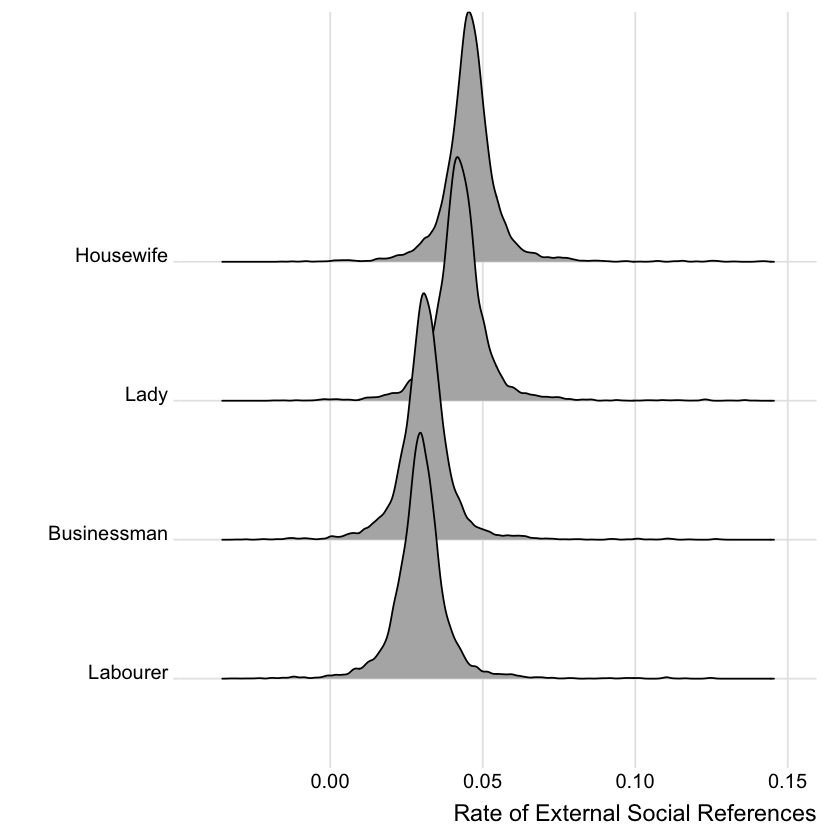

In [69]:
ggplot(f, aes(x = value, y = reorder(variable, value))) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Rate of External Social References") +
scale_x_continuous(limits = c(-0.04, .15))+
ylab("")

ggsave("20240724_PhD_DiaSocMWri.png")

In [55]:
#f8m <- readRDS("20240702_PhD_DiaChkSocF_02.rds")

In [70]:
f8m <- brm(
    formula= fppAllRate ~ 1 + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,1)",class="Intercept"),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=3000, warmup = 1000, seed = 4,
    control=list(adapt_delta=.99, max_treedepth=12),
    file = "20240724_PhD_DiaChkSocF_02"
)

print(f8m)

Compiling Stan program...

Start sampling

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Found more than one class "stanfit" in cache; using the first, from namespace 'rstan'

Also defined by ‘rethinking’

Warning message:
“There were 9 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“There were 9 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: fppAllRate ~ 1 + (1 | docauthorid) 
   Data: df2 (Number of observations: 1023) 
  Draws: 4 chains, each with iter = 3000; warmup = 1000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 4) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.03      0.03     0.01     0.10 1.00     1018     1421

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.03      0.02    -0.00     0.08 1.01     1239     1558

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.01      0.00     0.01     0.01 1.00     2991     2849

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at conver

In [71]:
post <- as_draws_df(f8m)

posterior_summary(f8m)[0:3,]

post_mdn <- 
  coef(f8m, robust = T)$docauthorid[, , ] %>% 
  data.frame()

head(post_mdn)

,Estimate,Est.Error,Q2.5,Q97.5
b_Intercept,0.03302765,0.0193387575,-0.003455402,0.07541304
sd_docauthorid__Intercept,0.03189011,0.0262361473,0.010390558,0.10153953
sigma,0.01271537,0.0002786641,0.012181902,0.01328353


,Estimate,Est.Error,Q2.5,Q97.5
,<dbl>,<dbl>,<dbl>,<dbl>
D0002,0.02509680,0.0005989203,0.02391845,0.02627887
D0003,0.05616791,0.0012341478,0.05368570,0.05866586
D0007,0.01881627,0.0007041481,0.01744342,0.02018711
D0009,0.03230434,0.0010345323,0.03020217,0.03436818


In [72]:
nd <- distinct(df2, docauthorid)


f <- data.frame(ranef(f8m,
         newdata = nd,
         re_formula = NA,
         probs = c(.1, .90), 
         summary = F))

colnames(f) <- c("Housewife", "Labourer", "Businessman", "Lady")

fe <- fixef(f8m, probs = .90)

f$Housewife <- fe[1,1] + f$Housewife
f$Labourer <- fe[1,1] + f$Labourer
f$Businessman <- fe[1,1] + f$Businessman
f$Lady <- fe[1,1] + f$Lady

f <- f %>%                                   
  gather(variable, value) 

summary(f$value)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.12246  0.01937  0.03096  0.03310  0.04835  0.17403 

Picking joint bandwidth of 0.00185

Saving 7 x 7 in image
Picking joint bandwidth of 0.00185



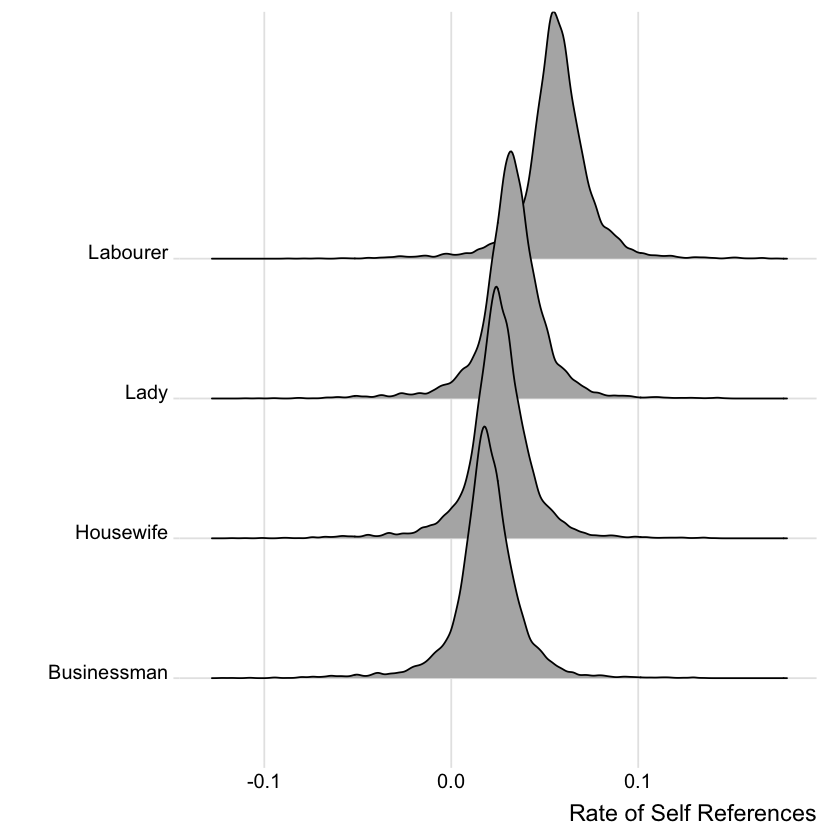

In [74]:
ggplot(f, aes(x = value, y = reorder(variable, value))) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Rate of Self References") +
scale_x_continuous(limits = c(-0.13, .18))+
ylab("")

ggsave("20240724_PhD_DiaSocFWri.png")

In [126]:
df1 %>% 
group_by(authorName) %>% 
select(authorName, indsTot, totalTokens)  %>% 
unique()  %>% 
mutate(indsRate = indsTot/totalTokens*100) %>% 
mutate(indsRate_alt1 = 100/indsRate) %>% 
mutate(indsRate_alt2 = totalTokens/indsTot) %>% 
arrange(desc(indsRate)) %>% 
mutate(across(c(indsRate_alt1, indsRate_alt2), round))

authorName,indsTot,totalTokens,indsRate,indsRate_alt1,indsRate_alt2
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
Edith C. Gwynne,817,28146,2.902722,34,34
Anne F. Richards,1267,81551,1.553629,64,64
John Hart,712,54919,1.296455,77,77
Henry H. Adams,221,19635,1.125541,89,89


<p><b>indsRate</b>: References to unique individuals per 100 words. Interpretation: The higher the value, the more "peopled" the narrative.</p>
<p><b>indsRate_alt1 and indsRate_alt2</b>: Number of words per reference to a unique individual. The higher the value, the less "peopled" the narrative.</p>

In [123]:
df1 %>% 
group_by(authorName) %>% 
select(authorName, fppAll_Ct, totalTokens)  %>% 
unique()  %>% 
mutate(fppAllRate = fppAll_Ct/totalTokens*100) %>% 
mutate(fppAllRate_alt1 = 100/fppAllRate) %>% 
mutate(fppAllRate_alt2 = totalTokens/fppAll_Ct) %>% 
arrange(desc(fppAllRate)) %>% 
mutate(across(c(fppAllRate, fppAllRate_alt1, fppAllRate_alt2), round))

authorName,fppAll_Ct,totalTokens,fppAllRate,fppAllRate_alt1,fppAllRate_alt2
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
Henry H. Adams,1121,19635,6,18,18
Edith C. Gwynne,913,28146,3,31,31
Anne F. Richards,2082,81551,3,39,39
John Hart,1030,54919,2,53,53


In [125]:
df1 %>% 
group_by(authorName) %>% 
select(authorName, fppSub_Ct, totalTokens)  %>% 
unique()  %>% 
mutate(fppSubRate = fppSub_Ct/totalTokens*100) %>% 
mutate(fppSubRate_alt1 = 100/fppSubRate) %>% 
mutate(fppSubRate_alt2 = totalTokens/fppSub_Ct) %>% 
arrange(desc(fppSubRate)) %>% 
mutate(across(c(fppSubRate, fppSubRate_alt1, fppSubRate_alt2), round))

authorName,fppSub_Ct,totalTokens,fppSubRate,fppSubRate_alt1,fppSubRate_alt2
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
Henry H. Adams,1013,19635,5,19,19
Edith C. Gwynne,802,28146,3,35,35
Anne F. Richards,1522,81551,2,54,54
John Hart,787,54919,1,70,70


<p><b>fpp[All/Sub]Rate</b>: Self-references per 100 words. Interpretation: The higher the value, the more inwardly focused the narrative.</p>
<p><b>fpp[All/Sub]Rate_alt1 and indsRate_alt2</b>: Number of words per self-reference. The higher the value, the less inwardly focused the narrative.</p>